In [2]:
import pandas as pd
from matplotlib import pyplot as plt


In [3]:
data_dir = "dataset/heart.csv"
df = pd.read_csv(data_dir)
df = df.dropna()


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Just wanted to make sure that all of the features were the correc type, thankfully they were! I would change them to ints or floats if they were anything else

According to the documentation, 0 means female and 1 means male

In [6]:
clr = df["sex"].map({0: "female", 1: "male"})

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Duplicated Values
We found comments about the dataset, claiming that there may be duplicate values. Let's search to see if there are indeed duplicates:

In [8]:
# Find and count duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_count = duplicate_rows.shape[0]

print("\nNumber of duplicate rows:", duplicate_count)



Number of duplicate rows: 723


We see that there are 723 duplicates, so let's remove them

In [9]:
df = df.drop_duplicates()

In [10]:
len(df)

302

The following cell was to look at the distribution of each of the attributes. I wanted to make histograms for continuous variables and bar charts for categorical.  

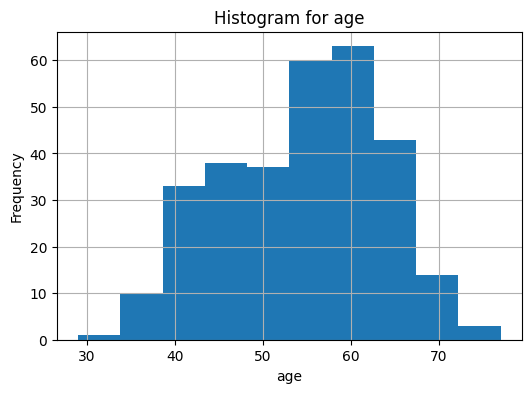

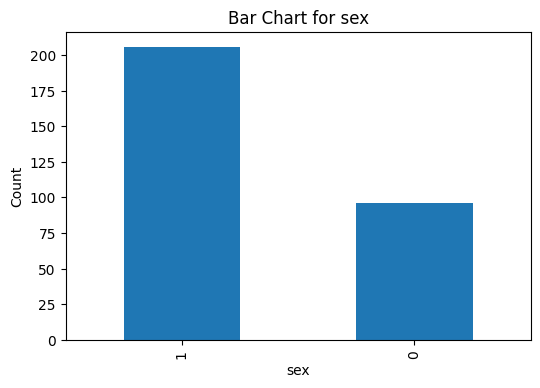

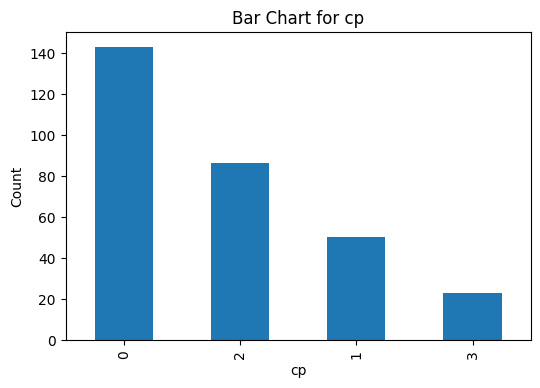

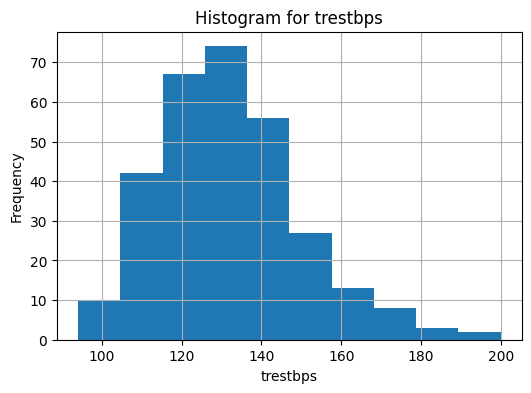

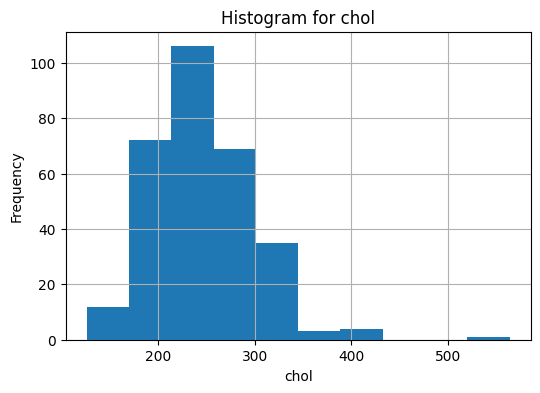

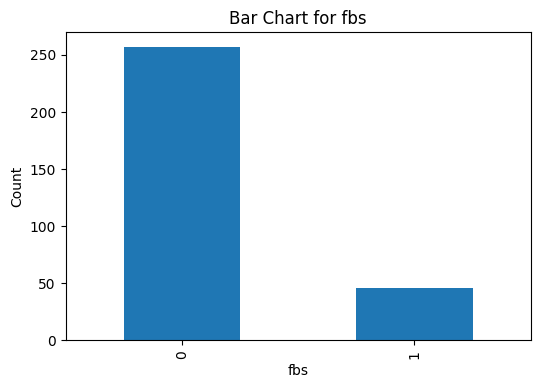

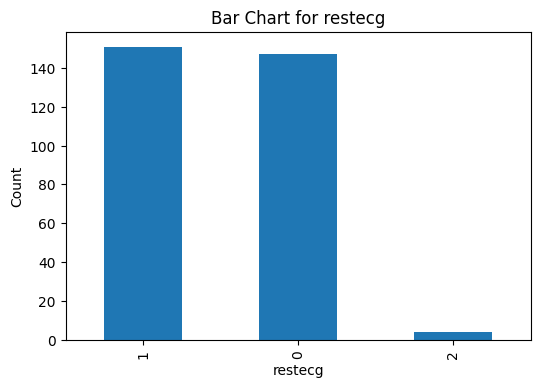

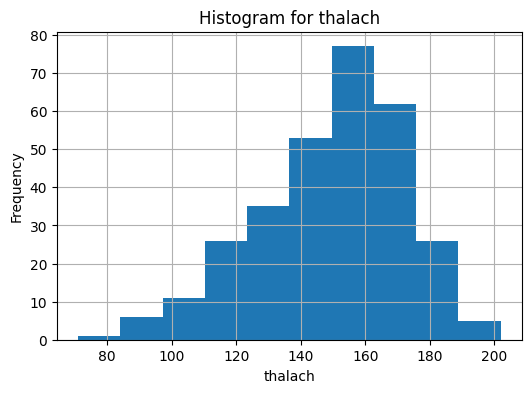

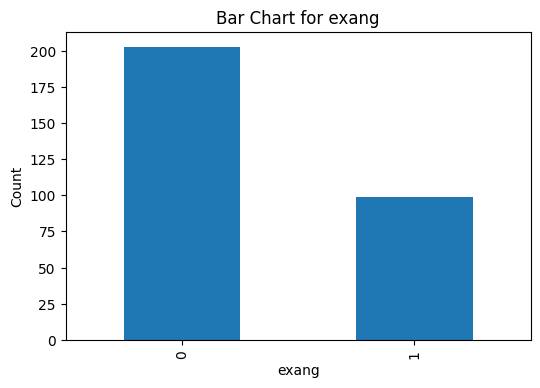

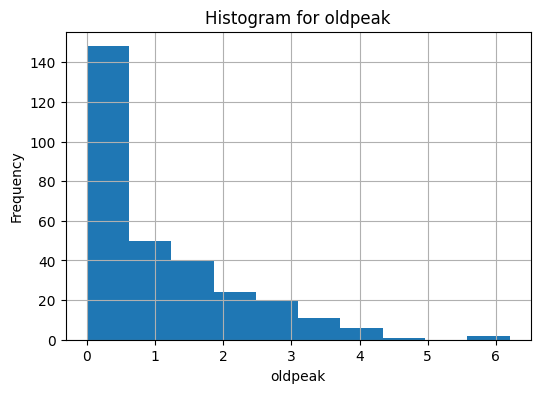

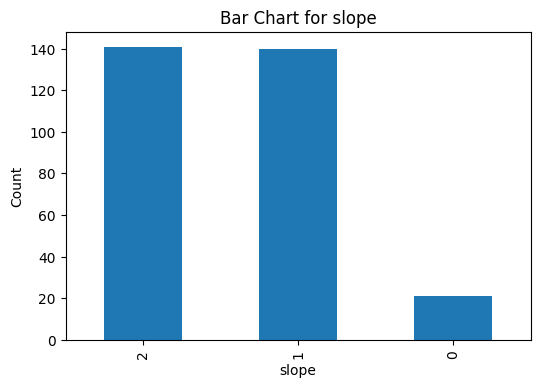

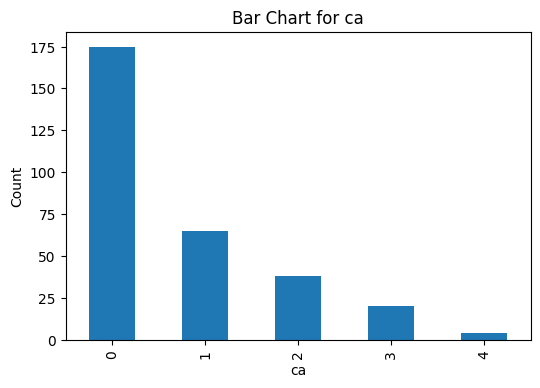

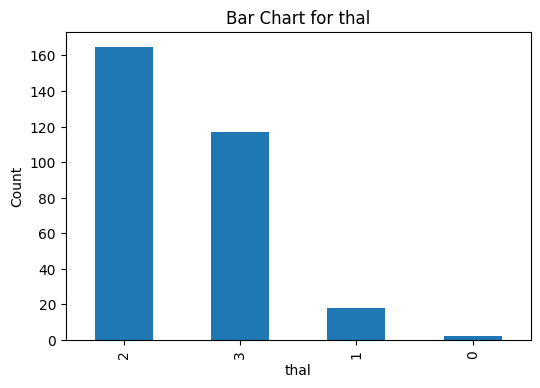

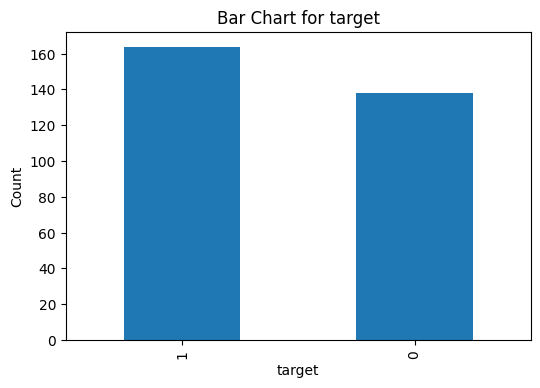

In [11]:
for name in df.columns:
    unique_values = df[name].dropna().unique()
    if set(unique_values).issubset({0, 1, 2, 3, 4, 5}):  # Check if the column is binary
        # Plot as a bar chart
        counts = df[name].value_counts()
        plt.figure(figsize=(6, 4))
        counts.plot(kind='bar')
        plt.title(f'Bar Chart for {name}')
        plt.xlabel(name)
        plt.ylabel('Count')
    else:
        # Plot as a histogram
        plt.figure(figsize=(6, 4))
        df[name].hist(bins=10)
        plt.title(f'Histogram for {name}')
        plt.xlabel(name)
        plt.ylabel('Frequency')
    plt.show()


After looking at these distribution plots, it looks like there are some outliers in the oldpeak, cholesteral, thal, and restecg. To remove data points for numerical data, we remove data points that fall outside of the 1st or 3rd quantile plus or minsu the interquartile range times 1.5. 1.5 was what I researched to be the typical value for the threshold in most data cleaning situations. 

In [12]:
def remove_outliers_numerical(df, threshold=1.5):
    outliers_removed = df.copy()
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outliers_removed = outliers_removed[(outliers_removed[column] >= lower_bound) & (outliers_removed[column] <= upper_bound)]
    return outliers_removed

print("Shape of the not cleaned dataset:", df.shape)

# Remove outliers from categorical columns

# Remove outliers from the dataset
df_cleaned = remove_outliers_numerical(df)

# Print the shape of the cleaned dataset
print("Shape of the cleaned dataset:", df_cleaned.shape)
df_cleaned.to_csv('dataset/heart_cleaned.csv', index=False)


Shape of the not cleaned dataset: (302, 14)
Shape of the cleaned dataset: (228, 14)


That seems to be quite a few data points taken from removing outliers. In hindsight, maybe I should have played with the threshold value to include more data points given that we were working with such little data to begin with. 

In the following cell, we will look at the relationship between each feature attribute and the target attribute. For continuous values, we will make a sort of scatter plot of the target class (0, 1) and the corresponding scatter plot of the feature data. For categorical values, we will make a bar chart of the categorical variables and color each categorical variable value with the target classification. 

/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_4637/950488183.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y=feature, data=df, jitter=True, palette='Set2', dodge=True)


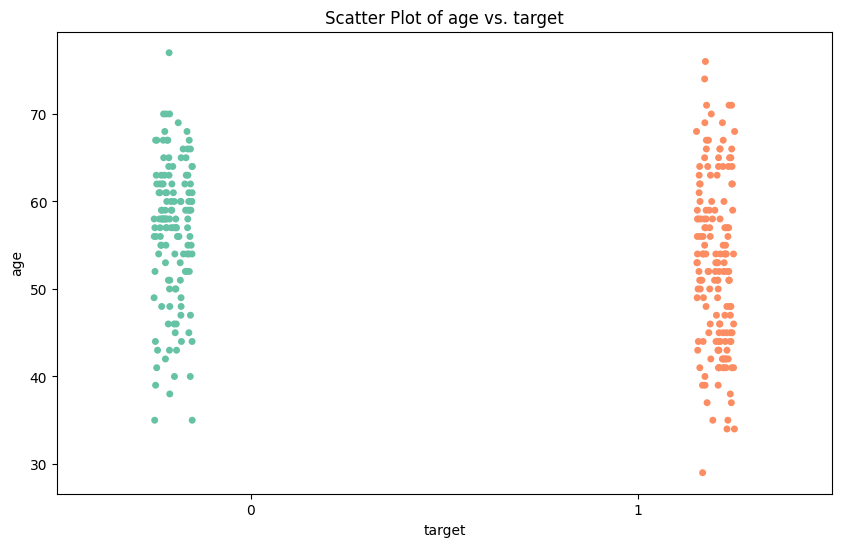

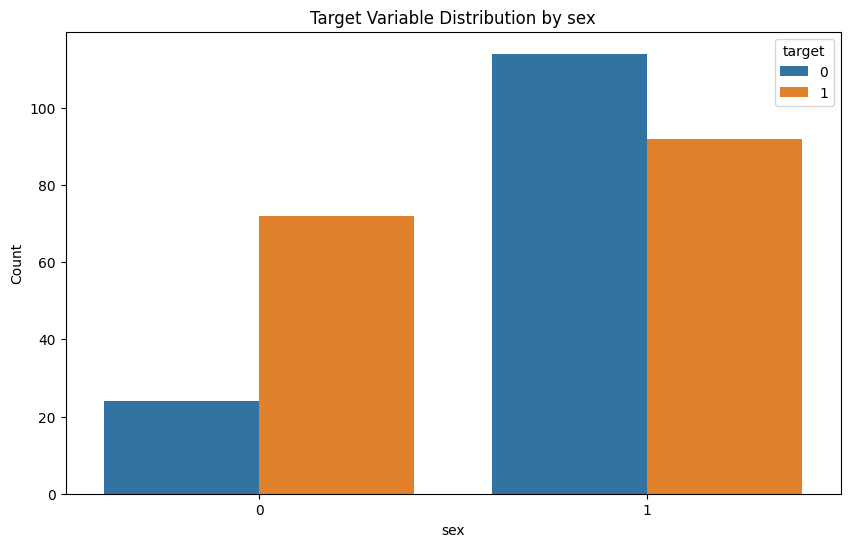

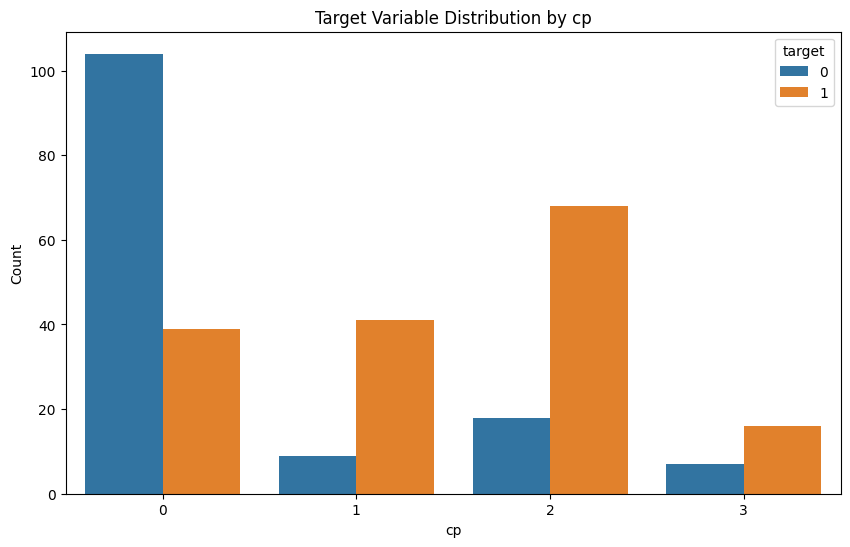

/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_4637/950488183.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y=feature, data=df, jitter=True, palette='Set2', dodge=True)


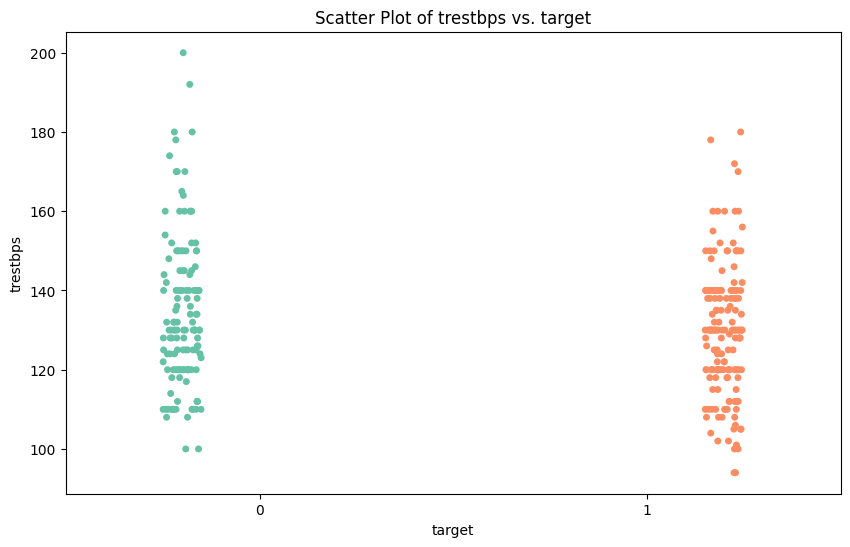

/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_4637/950488183.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y=feature, data=df, jitter=True, palette='Set2', dodge=True)


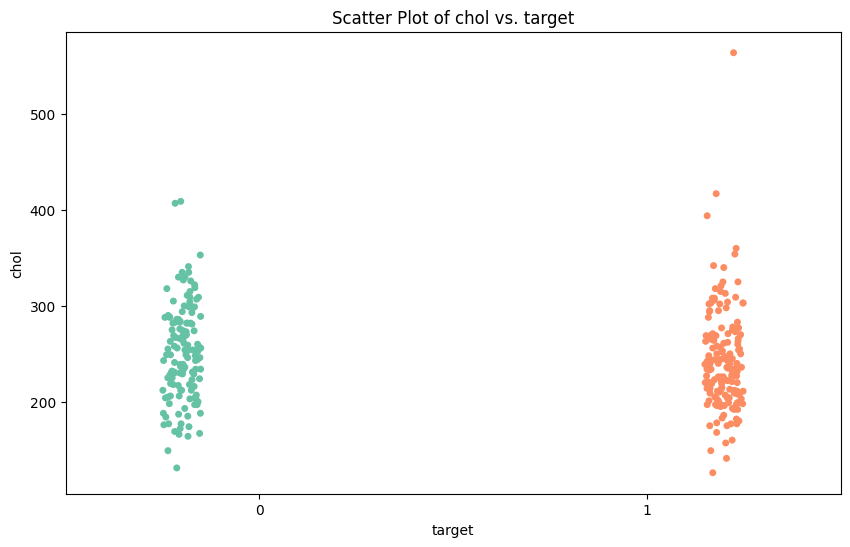

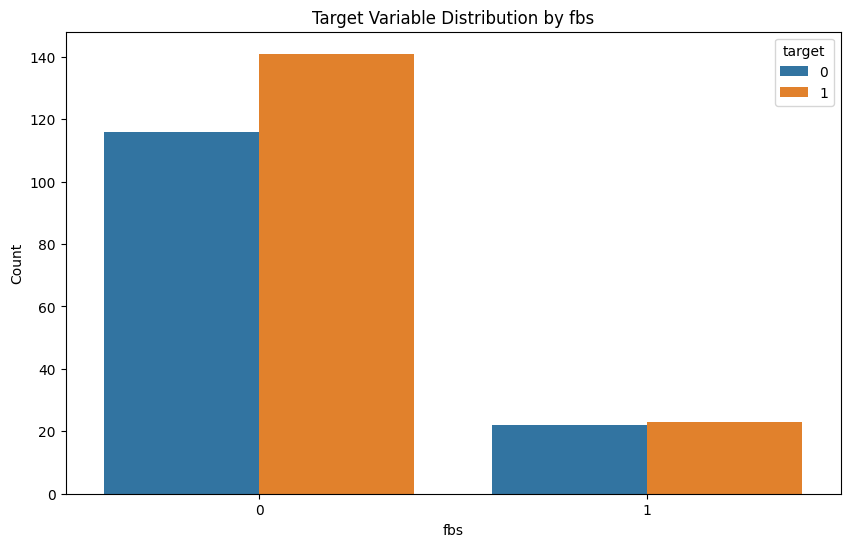

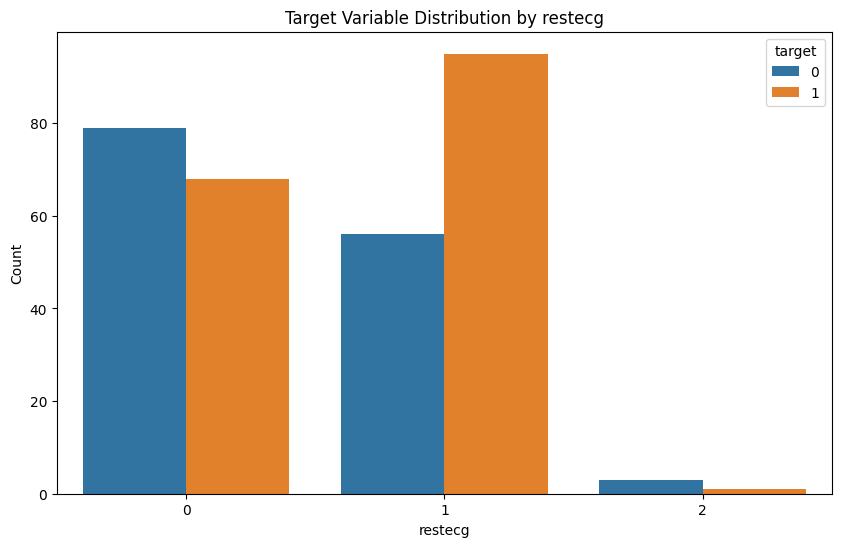

/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_4637/950488183.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y=feature, data=df, jitter=True, palette='Set2', dodge=True)


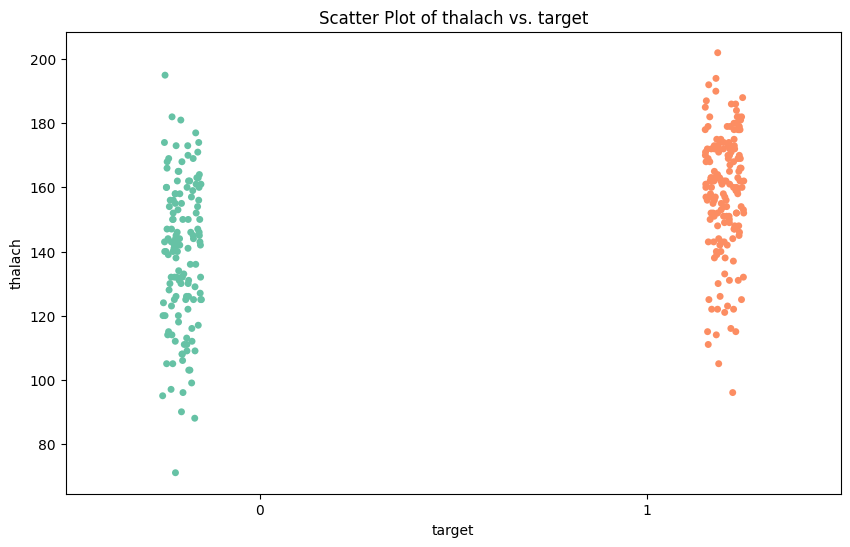

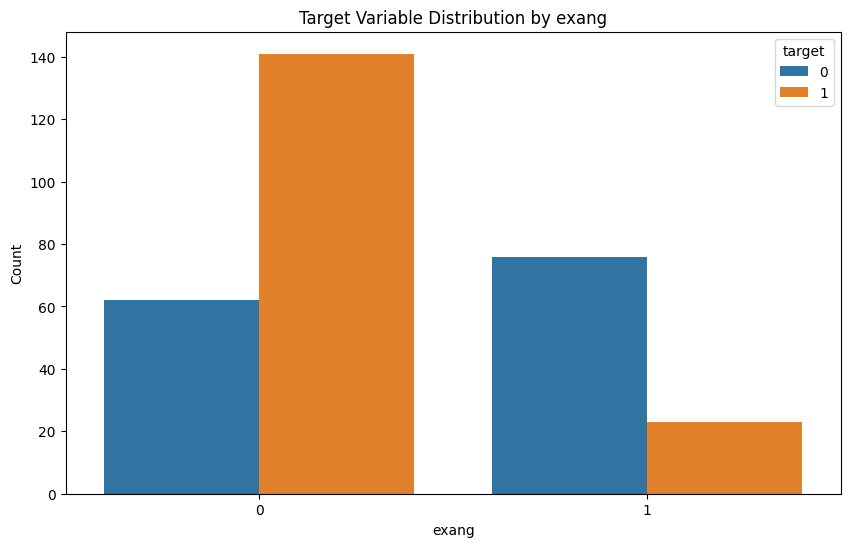

/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_4637/950488183.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y=feature, data=df, jitter=True, palette='Set2', dodge=True)


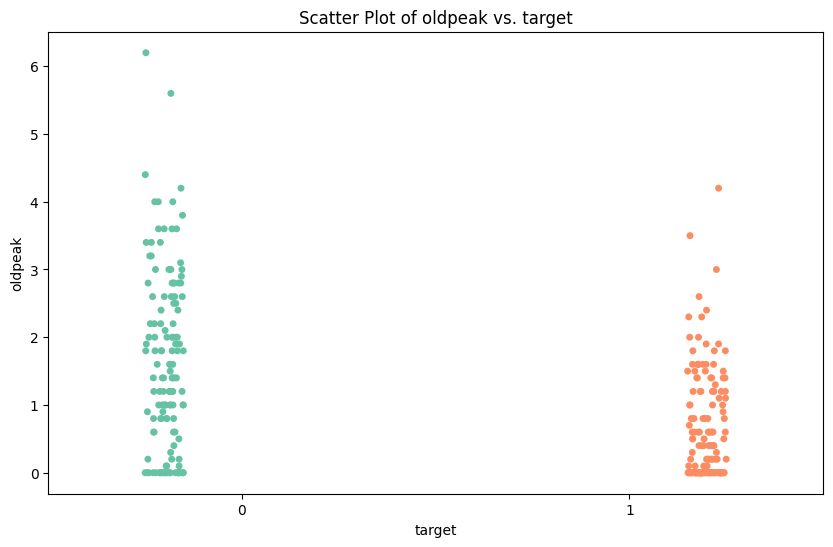

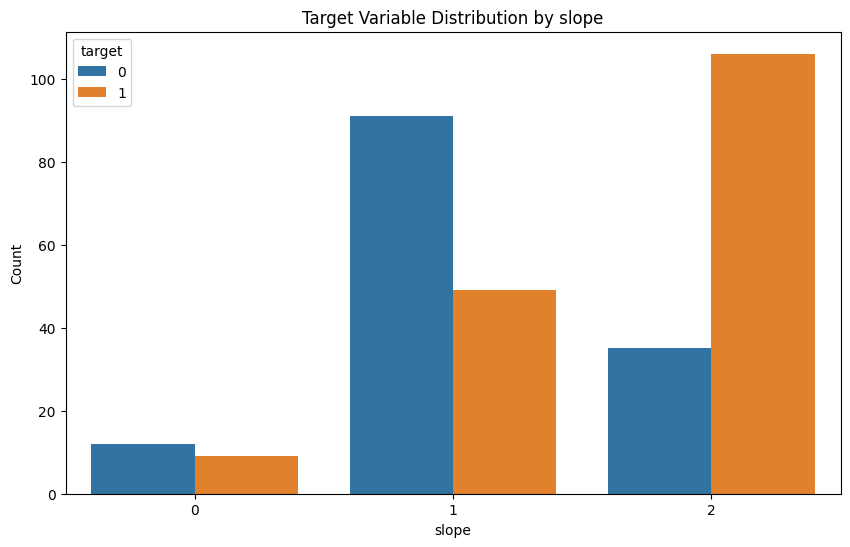

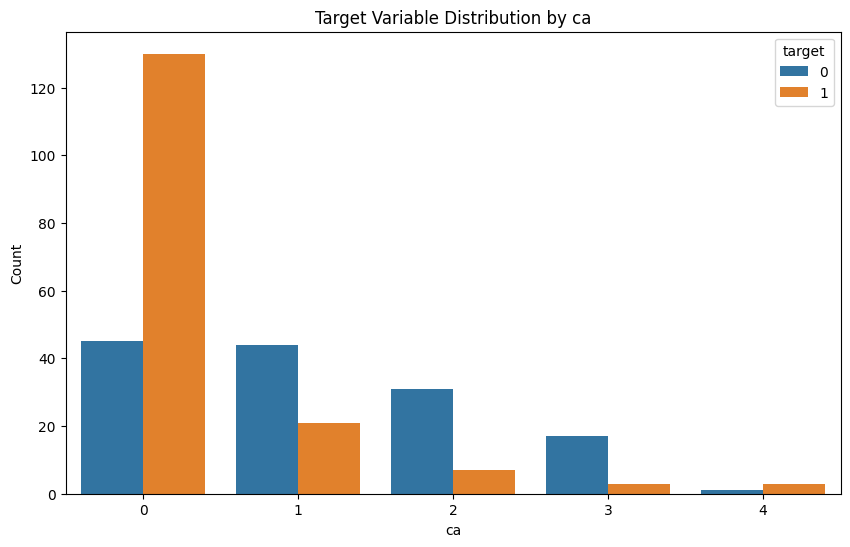

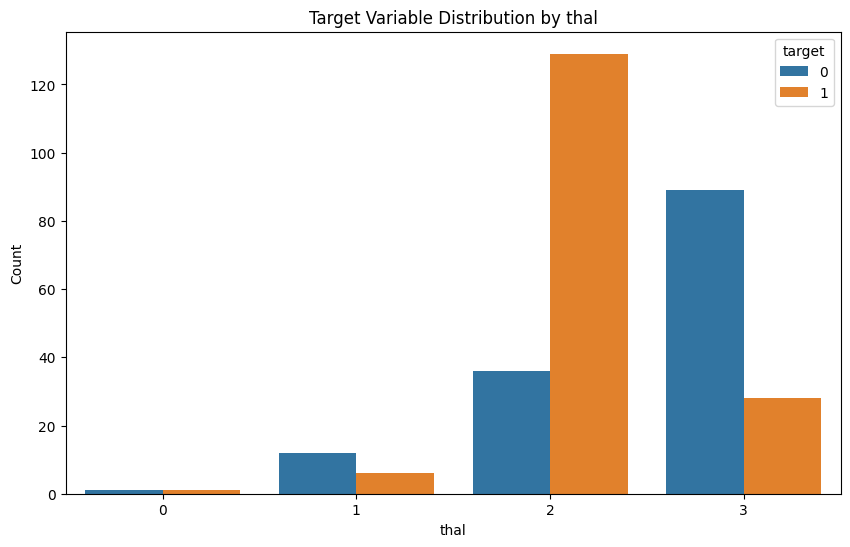

In [13]:
import seaborn as sns


scatter_plot_columns = ['age', 'trestbps', 'thalach', 'chol', 'oldpeak']

for feature in df.columns:
    if feature != 'target':
        plt.figure(figsize=(10, 6))
        if feature in scatter_plot_columns:
            sns.stripplot(x='target', y=feature, data=df, jitter=True, palette='Set2', dodge=True)
            plt.title('Scatter Plot of ' + feature + " vs. target")
            plt.xlabel('target')
            plt.ylabel(feature)
            plt.show()
            
        else:
            sns.countplot(x=feature, hue='target', data=df)
            plt.title(f'Target Variable Distribution by {feature}')
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.legend(title='target')
        plt.show()

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In the following cell, we will just look at a simple heat map of every single column attribute so that we can see which ones have the highest correlation to the target variable and to others. 

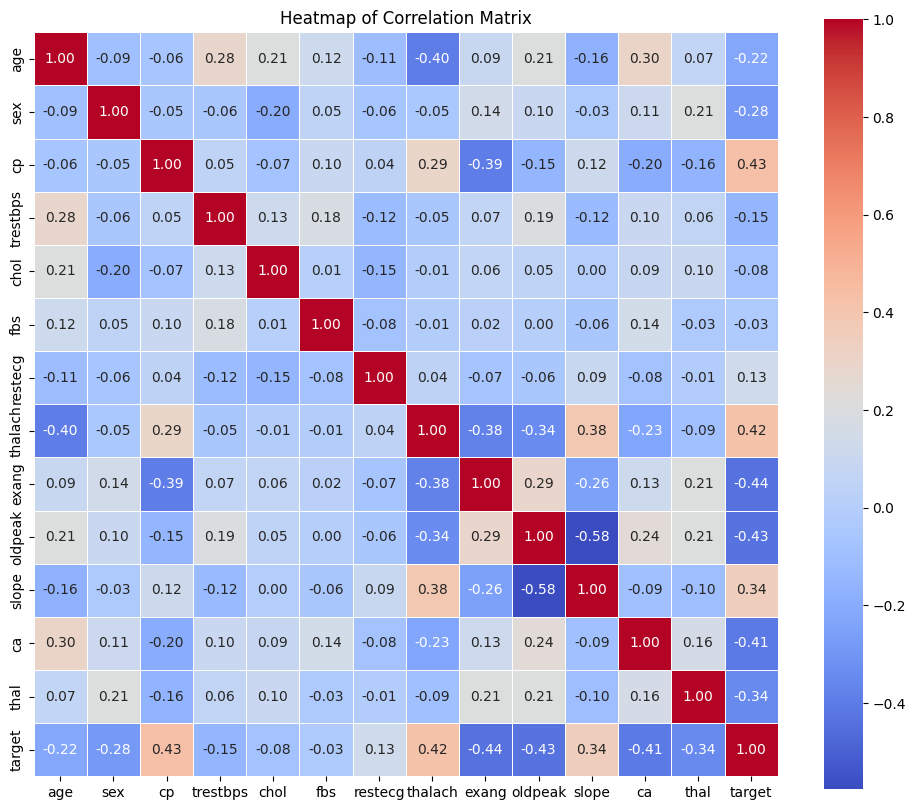

In [15]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Now I just want to see the feature correlations with the target

/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_4637/4289169430.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')


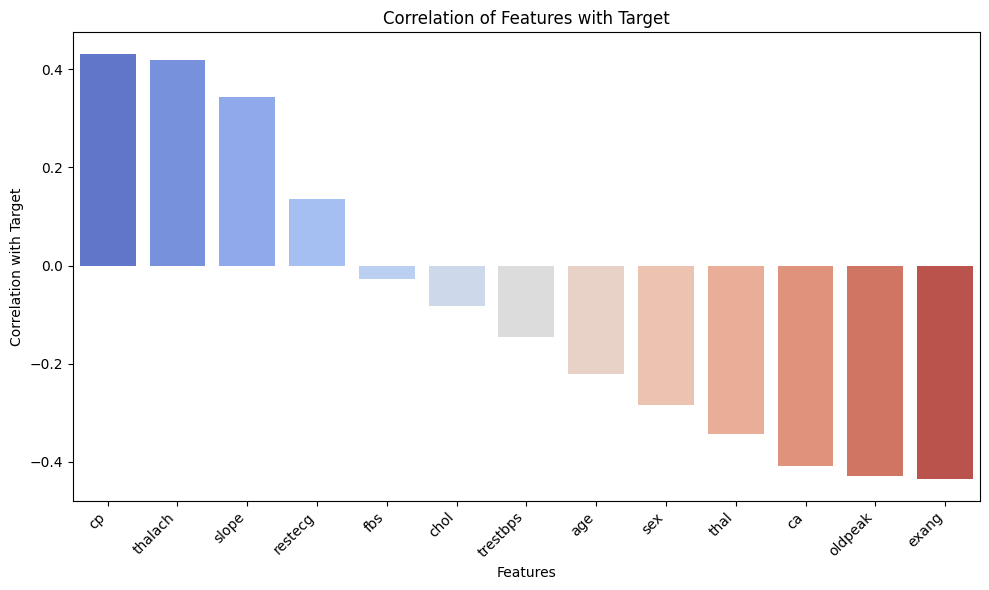

In [16]:
correlation_with_target = df.corr()['target'].drop('target').sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title('Correlation of Features with Target')
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

SO, more or less when I was selecting the final features, I knew that there were ways to metrically determine which features should be used to predict the target feature. However, for time and because these solutions were very complicated and difficult to understand, I just picked a subset of features whose correlation was higher with the target than they were with any of the other selected features. 

Selected Features: ['exang', 'cp', 'oldpeak', 'thalach', 'ca']


/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_4637/1422578658.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.loc[final_features].index, y=correlation_with_target.loc[final_features].values, palette='coolwarm')


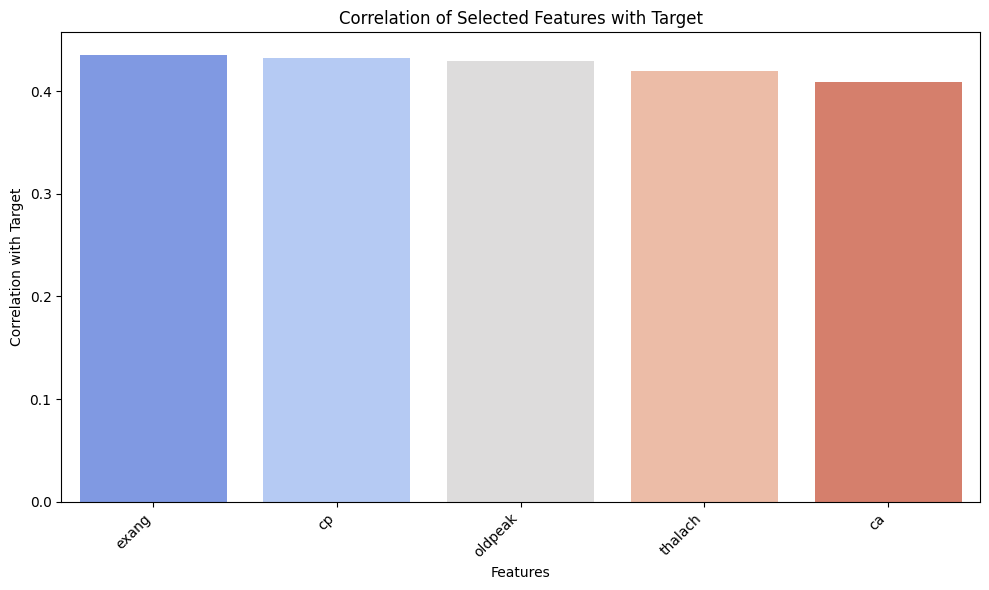

In [18]:


# Select features with inter-correlation below 0.41
final_features =["exang", "cp", "oldpeak", "thalach", "ca"]

print("Selected Features:", final_features)

# Create a bar plot for correlation with the target
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.loc[final_features].index, y=correlation_with_target.loc[final_features].values, palette='coolwarm')
plt.title('Correlation of Selected Features with Target')
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()